# AC2

Nesse notebook será documentado todo desenvolvimento do algoritmo genético.

## Grupo

- Vinícius Lourenço Claro Cardoso - 180618
- Henrique Rodrigues - 

## Problema

Para esse algoritmo, será considerado o seguinte problema: é necessário encontrar uma solução sub-ótima para a equação (ax + b), com o intuito de minimizar o erro da variáveis X e Y conhecidas.

Para calcular, `x` da função e o retorno da função, chamado de `y`, terão que ser respectivamente os valores de 1 a 1 milhão.
Ou seja, a resposta ideal dessa equação seria ter `a = 1` e `b = 0`.

## Métricas

Para saber como foi a evolução de cada algoritmo, abaixo será criado algumas funções que serão usadas em todos os códigos de algoritmo genético para que possa mensurar qual método foi mais eficiente.

In [1]:
%%writefile ga_metrics.py

import json
from datetime import datetime

def saveBestFit(metric, filename, populationSize, ages, a, b, timeSpent):
  fileContent = json.dumps([metric, populationSize, ages, a, b, timeSpent])

  with open(filename, 'w', encoding = 'utf-8') as f:
    f.write(fileContent)

def saveBestOfEachAges(metric, filename, bestOfEachAges):
  fileContent = json.dumps([metric, bestOfEachAges])

  with open(filename, 'w', encoding = 'utf-8') as f:
    f.write(fileContent)

def getInitialTime():
  return datetime.now()

def getTimeSpent(initialTime):
  return str(datetime.now() - initialTime)

Overwriting ga_metrics.py


### Variáveis Padrão

Para facilitar testar e reproduzir os resultados, abaixo um arquivo que exporta as variáveis como tamanho da população e `ages`/`epochs` que deve ser rodado, além de ter uma função para dizer quantos valores deve pegar para realizar a mutação.

In [2]:
%%writefile ga_variables.py

defaultPopulationSize = 1000
defaultAges = 10000

def getPopulationSize():
  return defaultPopulationSize

def getAges():
  return defaultAges

def getTopNForMutation():
  return 10

Overwriting ga_variables.py


## Algoritmo Genético - Não Paralelizado

Para começar, será apresentado como o código base do algoritmo genético foi feito, sem considerar paralelização.

### População inicial

Abaixo, a função que irá gerar a população inicial do algoritmo genético.

In [3]:
%%writefile ga_population.py

from random import uniform

def getPopulation(populationSize):
    population = []

    for _ in range(populationSize):
        item = uniform(0, populationSize)
        population.append((item, item))

    return population

Overwriting ga_population.py


### Fitness

Para começar, foi criado primeiro a função que irá treinar e executar a equação do problema mencionado anteriormente.


In [4]:
%%writefile ga_fitness.py

def fitness(a, b, x):
  ans = a * x + b

  # caso o valor retornado seja maior que o objetivo, x
  # eu divido o x pela resposta obtida, e isso ajuda a rankear
  # a resposta de acordo com o quão longe ela acabou sendo do x.
  if ans > x:
    return abs(x / ans)
  # eu fiz vários testes e uma das formas que mais deu resultado
  # foi retornar o ans para balancear, e isso trouxe bons resultados 
  # após várias gerações
  else:
    return ans

Overwriting ga_fitness.py


Sobre os argumentos:

- `a` e `b`: valores gerados automaticamente que serão mutados e selecionados.
- `x`: O valor a ser testado.

### Seleção

Abaixo, a função que faz a seleção dos melhores valores, ela será usada para filtrar de todos os valores testados, quais devem ir para a mutação e quais devem ser descartados.

A implementação dele é basicamente ordernar de forma descendente e depois pegar uma quantidade `limit` do topo.

In [5]:
%%writefile ga_selection.py

def selection(rankedSolutions, limit):
    rankedSolutions.sort(reverse=True)

    return rankedSolutions[:limit]

Overwriting ga_selection.py


### Mutação

Abaixo, a função que irá modificar os melhores valores com o objetivo de obter melhores valores para `a` e `b`.

A implementação basicamente é pegar as melhores opções e depois fazer um mix multiplicando também por um range entre 0.95~1.05 para variar um pouco os valores.
Com isso, temos então no final a lista com tuplas formadas pelos novos valores.

In [6]:
%%writefile ga_mutation.py

from random import choice
from random import uniform

def mutation(bestSolutions, populationSize):
    newPopulation = []

    for _ in range(populationSize):
        random = choice(bestSolutions)
        newA = random[1][0] * uniform(0.95, 1.05)
        newB = random[1][1] * uniform(0.95, 1.05)

        newPopulation.append((newA, newB))

    return newPopulation

Overwriting ga_mutation.py


### Rodando o código

Por fim, com essas funções criadas, basta agora rodar o código.

In [7]:
from math import floor
from ga_population import getPopulation
from ga_selection import selection
from ga_mutation import mutation
from ga_fitness import fitness
import ga_metrics

def geneticAlgorithm(ages, populationSize):
    initialPopulation = getPopulation(populationSize)

    bestRank = [0, [0, 0]]
    bestOfEachAges = []

    initialTime = ga_metrics.getInitialTime()

    for age in range(ages):

        rankedSolutions = []

        for index, item in enumerate(initialPopulation, start=1):
            rankedSolutions.append(
                (fitness(item[0], item[1], index), item, index)
            )

        print(f"=== Geração { age } best solutions ===")
        print(rankedSolutions[0])

        limit = 10
        bestSolutions = selection(rankedSolutions, limit)

        bestRank = bestSolutions[0]
        bestOfEachAges.append([age, bestRank[1][0], bestRank[1][1]])
        
        initialPopulation = mutation(bestSolutions, populationSize)

    timeSpent = ga_metrics.getTimeSpent(initialTime)

    ga_metrics.saveBestFit("Algoritmo Genético - Não Paralelizado", 'algorithm_1_best_fit.json', populationSize, ages, bestRank[1][0], bestRank[1][1], timeSpent)
    ga_metrics.saveBestOfEachAges(f"Algoritmo Genético - Não Paralelizado", f"algorithm_1_best_of_each_age.json", bestOfEachAges)

E aí, é só chamar a função.

In [8]:
from ga_variables import getPopulationSize, getAges

geneticAlgorithm(getAges(), getPopulationSize())

=== Geração 0 best solutions ===
(0.002531495616020584, (197.51169894814245, 197.51169894814245), 1)
=== Geração 1 best solutions ===
(0.1740004482084895, (2.838351791782312, 2.908759840952033), 1)
=== Geração 2 best solutions ===
(0.5302861450640968, (0.9319897173364593, 0.9537846128209466), 1)
=== Geração 3 best solutions ===
(0.5120188812776685, (0.9466132200952971, 1.0064397562024634), 1)
=== Geração 4 best solutions ===
(0.5148980959509395, (0.9392889109567029, 1.0028429552587859), 1)
=== Geração 5 best solutions ===
(0.4677256262874503, (0.9683208234733242, 1.1696847588537593), 1)
=== Geração 6 best solutions ===
(0.4774905669772348, (1.0312033359748962, 1.0630788743115256), 1)
=== Geração 7 best solutions ===
(0.4648586942125947, (1.0061744031325996, 1.1450169426458408), 1)
=== Geração 8 best solutions ===
(0.4848480027847854, (0.9676962414026181, 1.094805809253205), 1)
=== Geração 9 best solutions ===
(0.45521248819025867, (0.9708148505301908, 1.225961437342747), 1)
=== Geração

## Algoritmo Genético - Send/Recv

Agora, iremos realizar a implementação do mesmo código só que utilizando funções send/recv do `mpirun`.

### Instalação

Primeiro, temos que instalar o `mpirun` e `numpy`:

In [9]:
!pip install mpi4py


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...


In [10]:
!pip install numpy


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...


### Helpers

Depois, vamos criar algumas funções auxiliares para ajudar a rodar o código.

In [11]:
%%writefile ga_helpers.py

import numpy as np

# ref: https://stackoverflow.com/a/312464/8741188
def chunks(lst, n):
    return np.array_split(lst, n)

def log_normal(lvl, msg):
    if lvl >= 1:
      print(msg)

def log_info(lvl, msg):
    if lvl >= 2:
      print(msg)

def log_verbose(lvl, msg):
    if lvl >= 3:
        print(msg)

Overwriting ga_helpers.py


### Organização

Depois, será necessário modificar o código para rodar como `master` e `slave`, além de também processar e lidar com o código chamando o `send` e o `recv`.

Para esse código, a organização ficou a seguinte:

- `master`:
  - Pegar a população
  - Mutação
- `slave`
  - Treinamento
  - Seleção

### Master

Dessa forma, vamos começar com a criação da função irá que lidar com o `master`.

In [12]:
%%writefile ac2_send_recv_master.py

import ga_helpers
from ga_population import getPopulation
from ga_mutation import mutation
import ga_metrics

def handleMaster(comm, numSlaves, logLevel, populationSize, ages):
    initialPopulation = getPopulation(populationSize)

    ga_helpers.log_normal(logLevel, "master(): Começando a treinar as gerações.")

    bestRank = [0, [0, 0]]
    bestOfEachAges = []

    initialTime = ga_metrics.getInitialTime()

    for age in range(ages):

        bestSolutions = []
        chunksToSlave = ga_helpers.chunks(initialPopulation, numSlaves)

        for slaveId, chunk in enumerate(chunksToSlave, start=1):
            ga_helpers.log_info(logLevel, f"master(Geração { age }): Enviando { len(chunk) } para slave({ slaveId })")

            # envia uma lista de população para ser treinada
            comm.send(chunk, dest=slaveId)

        ga_helpers.log_info(logLevel, f"master(Geração { age }): Valores enviados, aguardando recebimento.")

        for slaveId, _ in enumerate(chunksToSlave, start=1):
            # recebe o resultado com os melhores valores já selecionados
            slaveBestSolutions = comm.recv(source=slaveId)

            ga_helpers.log_info(logLevel, f"master(Geração { age }): Recebido { len(slaveBestSolutions) } de slave({ slaveId })")

            bestSolutions.extend(slaveBestSolutions)

        bestSolutions.sort(reverse=True)

        if age % 10 == 0 or age <= 10:
            ga_helpers.log_normal(logLevel, f"=== Geração { age } best solution ===")
            ga_helpers.log_normal(logLevel, bestSolutions[0])

        bestRank = bestSolutions[0]
        bestOfEachAges.append([age, bestRank[1][0], bestRank[1][1]])

        initialPopulation = mutation(bestSolutions, populationSize)

    timeSpent = ga_metrics.getTimeSpent(initialTime)

    ga_metrics.saveBestFit(f"Algoritmo Genético - Send/Recv - { numSlaves + 1 } Slaves", f'algorithm_2_cores_{ numSlaves + 1 }_best_fit.json', populationSize, ages, bestRank[1][0], bestRank[1][1], timeSpent)
    ga_metrics.saveBestOfEachAges(f"Algoritmo Genético - Send/Recv - { numSlaves + 1 } Slaves", f"algorithm_2_cores_{ numSlaves + 1 }_best_of_each_age.json", bestOfEachAges)
    

Overwriting ac2_send_recv_master.py


### Slave

E abaixo, o código que irá lidar com o `slave`.

In [13]:
%%writefile ac2_send_recv_slave.py

import ga_helpers
from ga_selection import selection
from ga_fitness import fitness

def handleSlave(comm, id, logLevel, ages, selectTopN):
    for age in range(ages):

        partOfPopulation = comm.recv(source=0)

        ga_helpers.log_info(logLevel, f"slave({ id }): Treinando geração {age} com { len(partOfPopulation) } items")

        rankedSolutions = []

        for index, item in enumerate(partOfPopulation, start=1):
            xValueToTest = len(partOfPopulation) * (id - 1) + index

            rankedSolutions.append((fitness(item[0], item[1], xValueToTest), item, xValueToTest))

        bestSolutions = selection(rankedSolutions, selectTopN)
        ga_helpers.log_info(logLevel, f"slave({ id }): Melhor valor {rankedSolutions[0]} da geração {age}")

        comm.send(bestSolutions, dest=0)


Overwriting ac2_send_recv_slave.py


### Rodando

E por fim, vamos criar o código que irá juntar o `master` e o `slave` e irá rodar ambos.

In [14]:
%%writefile ac2_send_recv.py
 
from mpi4py import MPI
import ga_helpers
import ac2_send_recv_master
import ac2_send_recv_slave
import ga_variables

# Variáveis
# controla a quantidade que vai ser selecionado para mutar após treinar
selectTopN = ga_variables.getTopNForMutation()
populationSize = ga_variables.getPopulationSize()  # controla o tamanho da população
ages = ga_variables.getAges()  # controla o número de ages que irá rodar

# O nível do Log, quanto menor, mais rápido ele roda.
# NONE = 0
# NORMAL = 1
# INFO = 2
# VERBOSE = 3
logLevel = 1

def main():
    comm = MPI.COMM_WORLD
    id = comm.Get_rank()  # number of the process running the code
    numProcesses = comm.Get_size()  # total number of processes running
    myHostName = MPI.Get_processor_name()  # machine name running the code

    numSlaves = numProcesses - 1

    ga_helpers.log_normal(logLevel, f"node({id}): Começando a rodar...")

    if numProcesses > 1:
        if id == 0:
            ac2_send_recv_master.handleMaster(comm, numSlaves, logLevel, populationSize, ages)
        else:
            ac2_send_recv_slave.handleSlave(comm, id, logLevel, ages, selectTopN)
    else:
        print("Please run this program with 2 processes at least")

main()

Overwriting ac2_send_recv.py


E aí, é só chamar com a quantidade de processos que queremos, no caso, abaixo temos ele rodando com 3 processos, 1 para `master` e 2 como `slave`.

In [15]:
!mpirun -np 2 python ac2_send_recv.py

node(0): Começando a rodar...
master(): Começando a treinar as gerações.
node(1): Começando a rodar...
=== Geração 0 best solution ===
(0.8491975155131684, array([1.17514932, 1.17514932]), 483)
=== Geração 1 best solution ===
(0.8935311920387186, array([1.11686336, 1.18254137]), 516)
=== Geração 2 best solution ===
(0.9399230869274698, array([1.06268776, 1.20081028]), 977)
=== Geração 3 best solution ===
(0.9882756363326743, array([1.01037527, 1.09679551]), 737)
=== Geração 4 best solution ===
(989.9277580012823, array([0.99876711, 1.14832112]), 990)
=== Geração 5 best solution ===
(991.2082846318856, array([0.99606761, 1.11707687]), 994)
=== Geração 6 best solution ===
(993.0224724456843, array([0.99776492, 1.24414383]), 994)
=== Geração 7 best solution ===
(997.7758695895424, array([0.99753539, 1.23801618]), 999)
=== Geração 8 best solution ===
(988.6171900705644, array([0.99851907, 1.0818268 ]), 989)
=== Geração 9 best solution ===
(990.5951619370184, array([0.99245624, 1.1162914 ])

In [16]:
!mpirun -np 4 python ac2_send_recv.py

node(0): Começando a rodar...
master(): Começando a treinar as gerações.
node(2): Começando a rodar...
node(3): Começando a rodar...
node(1): Começando a rodar...
=== Geração 0 best solution ===
(490.27171016949575, array([0.50963795, 0.50963795]), 961)
=== Geração 1 best solution ===
(491.0969241586229, array([0.51802847, 0.52396226]), 947)
=== Geração 2 best solution ===
(554.9013299277871, array([0.55714747, 0.53959861]), 995)
=== Geração 3 best solution ===
(570.1396644259371, array([0.5748337 , 0.47946796]), 991)
=== Geração 4 best solution ===
(585.4412697997649, array([0.58904655, 0.51805037]), 993)
=== Geração 5 best solution ===
(611.4447104073398, array([0.6214638 , 0.54579578]), 983)
=== Geração 6 best solution ===
(651.5349288104819, array([0.65296061, 0.53320411]), 997)
=== Geração 7 best solution ===
(674.1323832708276, array([0.68317238, 0.52441802]), 986)
=== Geração 8 best solution ===
(685.3284686085758, array([0.68957173, 0.58373841]), 993)
=== Geração 9 best solutio

In [17]:
!mpirun -np 8 python ac2_send_recv.py

node(3): Começando a rodar...
node(7): Começando a rodar...
node(6): Começando a rodar...node(0): Começando a rodar...
master(): Começando a treinar as gerações.

node(5): Começando a rodar...
node(1): Começando a rodar...
node(4): Começando a rodar...
node(2): Começando a rodar...
=== Geração 0 best solution ===
(0.869850626567964, array([1.14845908, 1.14845908]), 987)
=== Geração 1 best solution ===
(0.9062399667808692, array([1.10185761, 1.09637452]), 684)
=== Geração 2 best solution ===
(0.956396180518708, array([1.0443891 , 1.18706219]), 987)
=== Geração 3 best solution ===
(0.9992836862007041, array([0.99737555, 1.2396138 ]), 371)
=== Geração 4 best solution ===
(987.5543519440366, array([0.993335  , 1.17269579]), 993)
=== Geração 5 best solution ===
(982.6685138432222, array([0.99637353, 1.24058874]), 985)
=== Geração 6 best solution ===
(982.7694421736153, array([0.99067319, 1.01231515]), 991)
=== Geração 7 best solution ===
(982.124483087325, array([0.99102181, 1.01289055]), 9

## Algoritmo Genético - Scatter/Gather

Agora, será implementado o algoritmo genético usando os métodos `scatter` e `gather`.

### Organização

Depois, será necessário modificar o código para rodar como `master` e `slave`, além de também processar e lidar com o código chamando o `scatter` e o `gather`.

Para esse código, a organização ficou a seguinte:

- `master`:
  - Pegar a população
  - Mutação
- `slave`
  - Treinamento
  - Seleção

### Master

Primeiro, vamos começar com o código do master para enviar e receber dados.

In [18]:
%%writefile ac2_scatter_gather_master.py

import ga_helpers
from ga_population import getPopulation
from ga_mutation import mutation
import ga_metrics

def handleMaster(comm, numSlaves, logLevel, populationSize, ages):
    initialPopulation = getPopulation(populationSize)

    ga_helpers.log_normal(logLevel, "master(): Começando a treinar as gerações.")

    bestRank = [0, [0, 0]]
    bestOfEachAges = []

    initialTime = ga_metrics.getInitialTime()

    for age in range(ages):

        bestSolutions = []
        chunksToSlave = ga_helpers.chunks(initialPopulation, numSlaves)

        ga_helpers.log_info(logLevel, f"master(Geração { age }): Enviando { len(initialPopulation) } para { numSlaves } slaves")
        comm.scatter(chunksToSlave, root=0)

        ga_helpers.log_info(logLevel, f"master(Geração { age }): Valores enviados, aguardando recebimento.")
        gatherResult = comm.gather([], root=0)

        ga_helpers.log_info(logLevel, gatherResult)

        for chunk in gatherResult:
            # recebe o resultado com os melhores valores já selecionados
            ga_helpers.log_info(logLevel, f"master(Geração { age }): Recebido { len(chunk) } de slave")

            bestSolutions.extend(chunk)

        bestSolutions.sort(reverse=True)

        if age % 10 == 0 or age <= 10:
            ga_helpers.log_normal(logLevel, f"=== Geração { age } best solution ===")
            ga_helpers.log_normal(logLevel, bestSolutions[0])

        bestRank = bestSolutions[0]
        bestOfEachAges.append([age, bestRank[1][0], bestRank[1][1]])

        initialPopulation = mutation(bestSolutions, populationSize)

    timeSpent = ga_metrics.getTimeSpent(initialTime)

    ga_metrics.saveBestFit(f"Algoritmo Genético - Scatter/Gather - { numSlaves } Slaves", f"algorithm_3_cores_{ numSlaves }_best_fit.json", populationSize, ages, bestRank[1][0], bestRank[1][1], timeSpent)
    ga_metrics.saveBestOfEachAges(f"Algoritmo Genético - Scatter/Gather - { numSlaves } Slaves", f"algorithm_3_cores_{ numSlaves }_best_of_each_age.json", bestOfEachAges)

Overwriting ac2_scatter_gather_master.py


### Slave

E para o `slave`, temos o código abaixo:

In [19]:
%%writefile ac2_scatter_gather_slave.py

import ga_helpers
from ga_selection import selection
from ga_fitness import fitness

def handleSlave(comm, id, logLevel, ages, selectTopN):
    for age in range(ages):

        partOfPopulation = comm.scatter([], root=0)

        ga_helpers.log_info(logLevel, f"slave({ id }): Treinando geração {age} com { len(partOfPopulation) } items")

        rankedSolutions = []

        for index, item in enumerate(partOfPopulation, start=1):
            xValueToTest = len(partOfPopulation) * (id - 1) + index

            rankedSolutions.append((fitness(item[0], item[1], xValueToTest), item, xValueToTest))

        bestSolutions = selection(rankedSolutions, selectTopN)
        ga_helpers.log_info(logLevel, f"slave({ id }): Melhor valor {rankedSolutions[0]} da geração {age}")

        comm.gather(bestSolutions, root=0)

Overwriting ac2_scatter_gather_slave.py


### Rodando

A seguir, o código que irá unir o `master` e `slave`.

In [20]:
%%writefile ac2_scatter_gather.py
 
from mpi4py import MPI
import ga_helpers
import ac2_scatter_gather_master
import ac2_scatter_gather_slave
import ga_variables

# Variáveis
# controla a quantidade que vai ser selecionado para mutar após treinar
selectTopN = ga_variables.getTopNForMutation()
populationSize = ga_variables.getPopulationSize()  # controla o tamanho da população
ages = ga_variables.getAges()  # controla o número de ages que irá rodar

# O nível do Log, quanto menor, mais rápido ele roda.
# NONE = 0
# NORMAL = 1
# INFO = 2
# VERBOSE = 3
logLevel = 1

def main():
    comm = MPI.COMM_WORLD
    id = comm.Get_rank()  # number of the process running the code
    numProcesses = comm.Get_size()  # total number of processes running
    myHostName = MPI.Get_processor_name()  # machine name running the code

    numSlaves = numProcesses

    ga_helpers.log_normal(logLevel, f"node({id}): Começando a rodar...")

    if numProcesses > 1:
        if id == 0:
            ac2_scatter_gather_master.handleMaster(comm, numSlaves, logLevel, populationSize, ages)
        else:
            ac2_scatter_gather_slave.handleSlave(comm, id, logLevel, ages, selectTopN)
    else:
        print("Please run this program with 2 processes at least")

main()

Overwriting ac2_scatter_gather.py


E para começar a testar a performance e rodar tudo isso, temos o comando abaixo:

In [21]:
!mpirun -np 2 python ac2_scatter_gather.py

node(0): Começando a rodar...
master(): Começando a treinar as gerações.
node(1): Começando a rodar...
=== Geração 0 best solution ===
(0.4969368547066348, array([1.99891259, 1.99891259]), 149)
=== Geração 1 best solution ===
(0.5239027343351439, array([1.90120581, 2.02217849]), 268)
=== Geração 2 best solution ===
(0.5507135330811392, array([1.8098004 , 1.97642441]), 328)
=== Geração 3 best solution ===
(0.5773045263396112, array([1.72775   , 1.87729252]), 423)
=== Geração 4 best solution ===
(0.6070107096722925, array([1.64272633, 1.87642657]), 400)
=== Geração 5 best solution ===
(0.6381855380899593, array([1.56257745, 1.91186356]), 438)
=== Geração 6 best solution ===
(0.6709035236332827, array([1.48570815, 2.00475532]), 416)
=== Geração 7 best solution ===
(0.7053332842952197, array([1.41322445, 1.85436933]), 408)
=== Geração 8 best solution ===
(0.742240309204113, array([1.34336533, 1.94579716]), 498)
=== Geração 9 best solution ===
(0.7793901299714516, array([1.2793784 , 1.74246

In [22]:
!mpirun -np 4 python ac2_scatter_gather.py

node(1): Começando a rodar...
node(3): Começando a rodar...
node(0): Começando a rodar...
master(): Começando a treinar as gerações.
node(2): Começando a rodar...
=== Geração 0 best solution ===
(0.2761122595610188, array([3.61450075, 3.61450075]), 501)
=== Geração 1 best solution ===
(0.29023266486619476, array([3.43851552, 3.76386532]), 538)
=== Geração 2 best solution ===
(0.30406488255891834, array([3.26666407, 3.64776961]), 165)
=== Geração 3 best solution ===
(0.3195394157932641, array([3.11970649, 3.77218527]), 385)
=== Geração 4 best solution ===
(0.3351746482261719, array([2.97867609, 3.58875041]), 741)
=== Geração 5 best solution ===
(0.3532884103974958, array([2.81949958, 3.77874954]), 342)
=== Geração 6 best solution ===
(0.37188383356909926, array([2.68082141, 3.89860365]), 476)
=== Geração 7 best solution ===
(0.3904308805989685, array([2.5553063 , 3.96176255]), 664)
=== Geração 8 best solution ===
(0.4089807977962745, array([2.44069192, 3.2771105 ]), 743)
=== Geração 9 b

In [23]:
!mpirun -np 8 python ac2_scatter_gather.py

node(0): Começando a rodar...
master(): Começando a treinar as gerações.
node(2): Começando a rodar...
node(6): Começando a rodar...
node(1): Começando a rodar...
node(4): Começando a rodar...
node(5): Começando a rodar...
node(3): Começando a rodar...
node(7): Começando a rodar...
=== Geração 0 best solution ===
(0.4683251108157748, array([2.13054476, 2.13054476]), 451)
=== Geração 1 best solution ===
(0.49183492301799786, array([2.02986878, 2.17025842]), 651)
=== Geração 2 best solution ===
(0.5134884915776629, array([1.94341079, 2.12757394]), 525)
=== Geração 3 best solution ===
(0.5364015615961192, array([1.86176624, 2.18258686]), 870)
=== Geração 4 best solution ===
(0.5627014554223451, array([1.77449367, 2.09693015]), 792)
=== Geração 5 best solution ===
(0.5921559508741543, array([1.68629254, 2.000656  ]), 816)
=== Geração 6 best solution ===
(0.6216475162083634, array([1.60462691, 2.00486738]), 501)
=== Geração 7 best solution ===
(0.6492666676002279, array([1.53696883, 2.05451

## Resultados

Para analisar os resultados, foi gerado um JSON com o título do gráfico, o tamanho da população, a quantidade de `ages` e o melhor valor encontrado de `a` e `b`.

Primeiro vamos parsealizar todos esse arquivos e depois exibir em uma tabela.

Mas antes, é necessário instalar uma lib para exibir a tabela:

In [24]:
!pip install tabulate
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...


In [25]:
from os import listdir
from os.path import isfile, join
import json
from tabulate import tabulate

path = './'
allFiles = [f for f in listdir(path) if isfile(join(path, f))]
jsonFilesWithMetrics = list(filter(lambda f: f.endswith('_best_fit.json'), allFiles))

metrics = []

for jsonFile in jsonFilesWithMetrics:
  file = open(jsonFile)
  metrics.append(json.load(file))

metrics.sort()

metrics.insert(0, ["Nome", "População", "Age/Epoch", "Melhor a", "Melhor b", "Tempo Gasto"])

print(tabulate(metrics, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════════════════════╤═════════════╤═════════════╤════════════╤═════════════╤════════════════╕
│ Nome                                           │   População │   Age/Epoch │   Melhor a │    Melhor b │ Tempo Gasto    │
╞════════════════════════════════════════════════╪═════════════╪═════════════╪════════════╪═════════════╪════════════════╡
│ Algoritmo Genético - Não Paralelizado          │        1000 │       10000 │   0.989078 │ 1.03804e-05 │ 0:00:26.454053 │
├────────────────────────────────────────────────┼─────────────┼─────────────┼────────────┼─────────────┼────────────────┤
│ Algoritmo Genético - Scatter/Gather - 2 Slaves │        1000 │       10000 │   0.979167 │ 0.00259645  │ 0:00:47.561549 │
├────────────────────────────────────────────────┼─────────────┼─────────────┼────────────┼─────────────┼────────────────┤
│ Algoritmo Genético - Scatter/Gather - 4 Slaves │        1000 │       10000 │   0.990827 │ 0.00958918  │ 0:01:11.876354 │
├───────────────

Além dessa tabela, foi coletado também dados sobre o melhor `a` e `b` de cada `age` de cada teste acima.

Abaixo, os gráficos que representam a evolução da precisão com relação ao valor `1`, ou seja, quão mais próximo ou exato a `1` melhor.

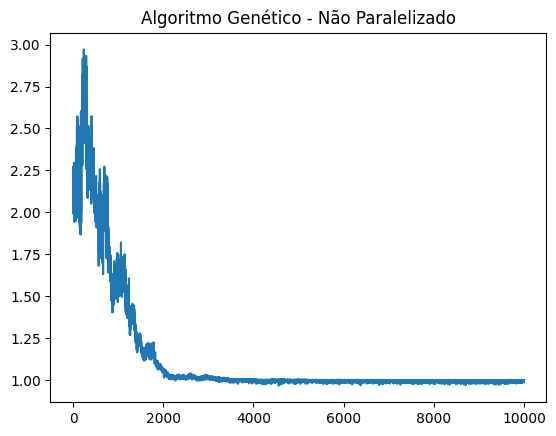

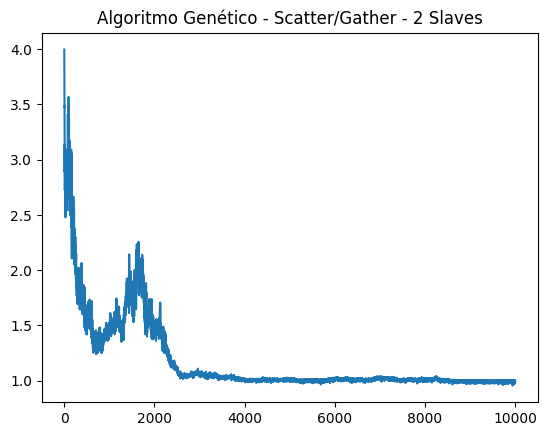

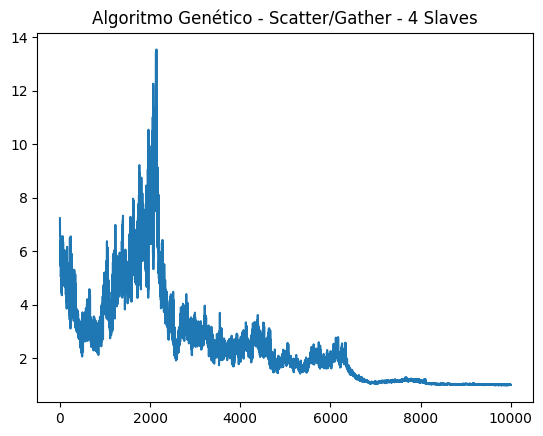

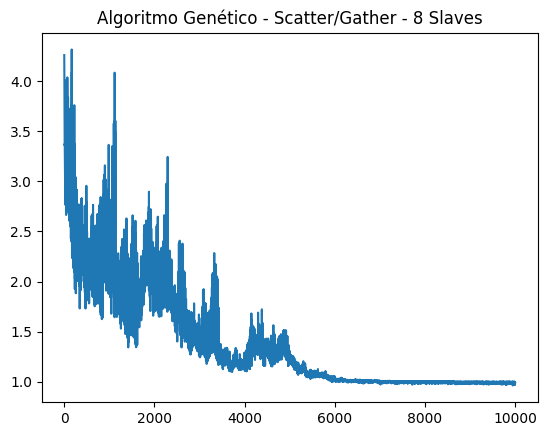

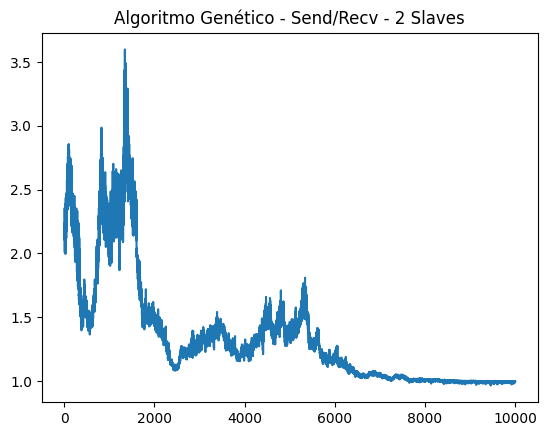

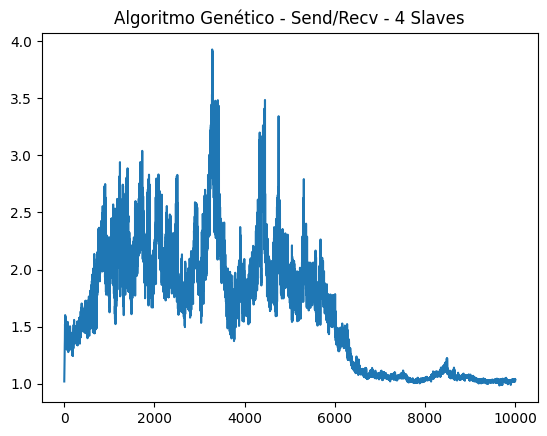

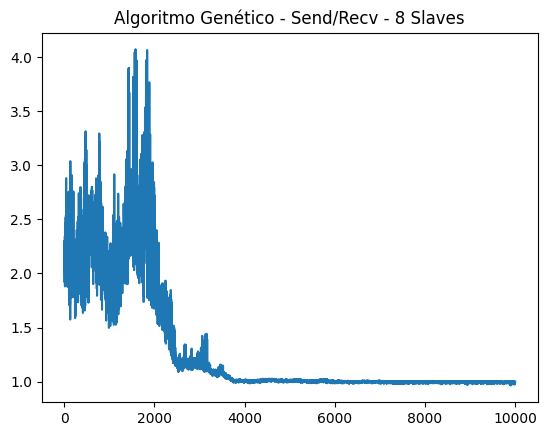

In [26]:
import matplotlib.pyplot as plt

bestOfEachAgeJsonFiles = list(filter(lambda f: f.endswith('_best_of_each_age.json'), allFiles))

abEvolutionMetrics = []

for jsonFile in bestOfEachAgeJsonFiles:
  file = open(jsonFile)
  abEvolutionMetrics.append(json.load(file))

abEvolutionMetrics.sort()

targetXToTest = 1
abEvolutionMetricsXY = []

for dataItem in abEvolutionMetrics:
  metric = dataItem[0]
  dataPoints = dataItem[1]

  xPoints = []
  yPoints = []

  for dataPoint in dataPoints:
    age = dataPoint[0]
    aValue = dataPoint[1]
    bValue = dataPoint[2]
    y = aValue * targetXToTest + bValue

    xPoints.append(age)
    yPoints.append(y)

  plt.title(metric)
  plt.plot(xPoints, yPoints)
  plt.show()